# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

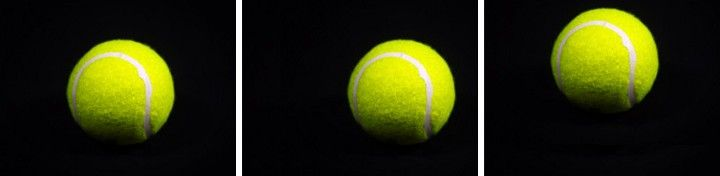



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [25]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

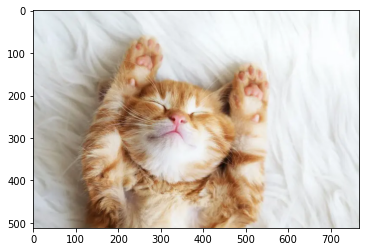

In [77]:
url = 'https://mk0lanoticiavesdar5g.kinstacdn.com/wp-content/uploads/2020/08/los-gatos-mas-famosos-del-mundo-768x512.jpeg.webp' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


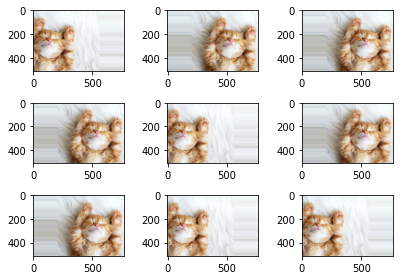

In [44]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image twist means revert the rows and column of pixels in the case of a horizontal or vertical twist, respectly.
The increase is specifie through a boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**.

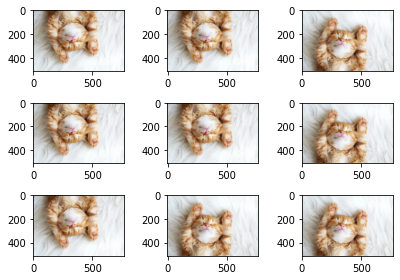

In [45]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The quantity of zoom is uniformly sampling at random of the zoom region to each dimension (width, height) separately.

Floater or  [lower limit, upper limit]. Range for random zoom. If is a floter, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range] 

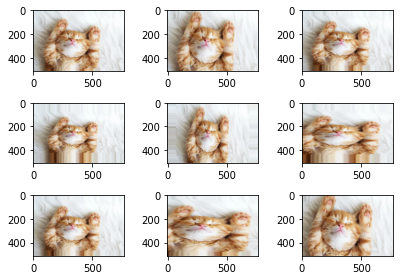

In [46]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

It turns the image randomly in the way of the clockwise, a determine the number of grades from 0 to 360. It is probably that turn the pixels turn out of the picture frame and leave out areas of the frame without pixels data, that must be completed.

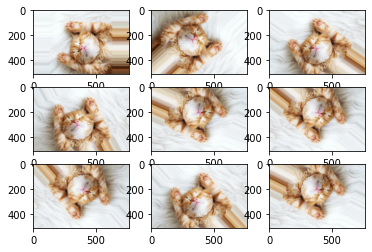

In [47]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques let us increase the data quantity of the dataset to use, in many works it uses an increase of data to increase the number of training images and improve the precision of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

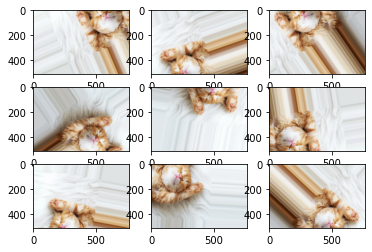

In [48]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

# **ImageDataGenerator**

ARGUMENTS

*   *Directory:* string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. See this script for more details.
*   *Target_size:* Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.
color_mode: One of "grayscale", "rgb", "rgba". 


*   *Default*: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

*   classes: Optional list of class subdirectories (e.g. ['dogs', 'cats']). 
*   Default: None. If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory, where each subdirectory will be treated as a different class (and the order of the classes, which will map to the label indices, will be alphanumeric). The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices.


*  class_mode: One of "categorical", "binary", "sparse", "input", or None.


*   Default: "categorical". Determines the type of label arrays that are returned: - "categorical" will be 2D one-hot encoded labels, - "binary" will be 1D binary labels, "sparse" will be 1D integer labels, - "input" will be images identical to input images (mainly used to work with autoencoders). - If None, no labels are returned (the generator will only yield batches of image data, which is useful to use with model.predict()). Please note that in case of class_mode None, the data still needs to reside in a subdirectory of directory for it to work correctly.
*   batch_size: Size of the batches of data (default: 32).


*  shuffle: Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order.
*   seed: Optional random seed for shuffling and transformations.


*   save_to_dir: None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).
*   save_prefix: Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).
save_format: One of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".


*   follow_links: Whether to follow symlinks inside class subdirectories (default: False).
*  subset: Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator


*   interpolation: Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.
















Now, we consider words, the necessary work is not that simple given the inherent complexity of the language (we can not replace each word for their synonym and even if we do, we take the risk that the sentence meaning change completely. Exist some libraries that can help us to realize this task, we will start analyzing the following:

1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python Framework for adversary attacks, adversary training, and an increase of data in NLP. We will only focus on the increase of data.

In [49]:
!pip install textattack

In [55]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [79]:
text = "My agonizing phantom pain is still the same"

TextAttack provides us four methods for data increment.


## WordNetAugmenter
Augment the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.




In [81]:
aug = WordNetAugmenter();
aug.augment(text)

['My agonizing phantom pain is relieve the same']


## EmbeddingAugmenter
 Increases the text transforming words with his incrustations, with a restriction to guarantee that the similitude of coseno is at least of 0,8.

In [82]:
aug = EmbeddingAugmenter();
aug.augment(text)

['My agonizing ghost pain is still the same']

## CharSwapAugmenter
It increases the text substituting, removing, inserting, and exchanging adjacent characters

In [83]:
aug = CharSwapAugmenter()
aug.augment(text)

['yM agonizing phantom pain is still the same']


## EasyDataAugmenter
This increases the text with a replacement combination of synonyms from Wordnet, word eraser, order change of words, and synonyms insertions. All these four functionalities occur randomly. Then we will obtain different results every time we execute the code. This returns four augmented results, in comparison to the other methods.


In [84]:
aug = EasyDataAugmenter()
aug.augment(text)

['phantom agonizing My pain is still the same',
 'My agonizing phantom pain is excruciating still the same',
 'My agonizing phantom is still the same',
 'My agonizing apparition pain is still the same']

Googletrans  utilices the API Ajax of Google Translate for the detenction and language translations.


The key parameters fot the method **translate ()** are:



1.   **src**: Origin language. this parameter is opcional because **googletrans** will detect it.
2.   **dest**: target language. Obligatory Parameter.

1.   **text**: The text that is gonna be translated from the origin language to the target language. Obligatory parameter





 


At using this method that occurs is a retranslation, we pass the origin language to a target language, then we come back to the original, during this retranslation, there is a slight change in the sentence between the origin text and the retranslate text, but the general meaning of the sentence is still conserved.

The supported languages can be consulted in https://cloud.google.com/translate/docs/languages?hl=es

To obtain better results, it´s recommended make some tests with the languages, if the destiny language is very similar, the translation doesn't lose information, however it may have the problem that the translation is very literal, this can be like a little problem of try and failure.

Some language examples:


*   Afrikaans	'af'

*   Chinese (simplificado) 	'zh-CN o zh'

*   *Esperanto*	'eo'

*   Japanese	'ja'
*   Latin	'la'


*   Spanish	'es'


*   Turkmen	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [64]:
!pip install googletrans

In [65]:
from googletrans import Translator
translator = Translator()

In [86]:
origin_text = "God I just want to be young forever"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='la').text
print(origin_text)
print(text_trans)
print(final)

God I just want to be young forever
Nkulunkulu Ngifuna nje ukuba musha kuze kube phakade
EGO iustus volo ut fiat novus Dei usque in aeternum


In [87]:
origin_text = "I wish all my weaknesses could be hidden."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

I wish all my weaknesses could be hidden.
私の弱点をすべて隠すことができればいいのにと思います。
Ojalá pudiera ocultar todas mis debilidades.


In [88]:
origin_text = "Crying out a silent cry"
text_trans = translator.translate(text=origin_text, dest='af').text
final=translator.translate(text=text_trans, dest='eo').text
print(origin_text)
print(text_trans)
print(final)

Crying out a silent cry
Huil 'n stille huil
Ploru silenta krio
